In [903]:
# autoreload
%load_ext autoreload
%autoreload 2

# fix path
import sys
sys.path.append("/home/jxm/reverse-training")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [904]:
from utils.analysis import load_results_as_df
import os


HOME_DIR = "/home/jxm/reverse-training"
df = load_results_as_df(os.path.join(HOME_DIR, "results", "03-26-ablation-projection-2"))
df["seed_dataset_size"] = df["select_seed_dataset"].str.extract(r"(\d+)").astype(int)


Found 212 files in /home/jxm/reverse-training/results/03-26-ablation-projection-2/*.pkl
Filtered 0/212 results with no evaluation metrics
dict_keys(['data', 'time_elapsed', 'full_ot_distance', 'sinkhorn_distance', 'jaccard_overlap_examples', 'jaccard_overlap_vocabulary', 'levenshtein_stats', 'args', 'expert_evaluation_metrics', 'evaluation_metrics'])


In [905]:
import pandas as pd

pd.set_option('display.max_rows', None)

dv_cols = ["dataset", "select_seed_dataset", "select_full_dataset_size", "select_batch_fill_strategy"]

iv_cols = ["evaluation_best_eval_accuracy", "dataset_sinkhorn_distance", "dataset_full_ot_distance", "dataset_jaccard_overlap_vocabulary"]

# final_df = df[df["select_seed_dataset"] == "nq_500000"]

df.groupby(dv_cols)[iv_cols].mean().sort_values(
    by=["dataset","select_seed_dataset", "select_full_dataset_size", "select_batch_fill_strategy"], 
    ascending=False
)

evaluation_best_eval_accuracy  \
dataset       select_seed_dataset select_full_dataset_size select_batch_fill_strategy                                  
dbpedia_10000 nq_100000           1000                     greedy                                           0.632886   
ag_news_10000 nq_100000           1000                     topk_balanced                                    0.609628   
                                                           topk                                             0.322562   
                                                           random                                           0.622628   
                                                           greedy_batched                                   0.618042   
                                                           greedy                                           0.714258   

                                                                                       dataset_sinkhorn_distance  \
dataset       select_seed_dataset select_full_dataset_size select_batch_fill_strategy                              
dbpedia_10000 nq_100000           1000                     greedy                                       1.140808   
ag_news_10000 nq_100000           1000                     topk_balanced                                1.289468   
                                                           topk                                         1.294719   
                                                           random                                       1.291698   
                                                           greedy_batched                               1.282993   
                                                           greedy                                       1.262178   

                                                                                       dataset_full_ot_distance  \
dataset       select_seed_dataset select_full_dataset_size select_batch_fill_strategy                             
dbpedia_10000 nq_100000           1000                     greedy                                      0.900093   
ag_news_10000 nq_100000           1000                     topk_balanced                               1.051644   
                                                           topk                                        1.060746   
                                                           random                                      1.053795   
                                                           greedy_batched                              1.044415   
                                                           greedy                                      1.021324   

                                                                                       dataset_jaccard_overlap_vocabulary  
dataset       select_seed_dataset select_full_dataset_size select_batch_fill_strategy                                      
dbpedia_10000 nq_100000           1000                     greedy                                                0.311157  
ag_news_10000 nq_100000           1000                     topk_balanced                                         0.354724  
                                                           topk                                                  0.342928  
                                                           random                                                0.359789  
                                                           greedy_batched                                        0.354869  
                                                           greedy                                                0.345505

In [906]:


dv_cols = ["dataset", "select_projection_dim", "select_full_dataset_size", "select_batch_fill_strategy"]

iv_cols = ["evaluation_best_eval_accuracy", "dataset_sinkhorn_distance", "dataset_levenshtein_stats_average_distance", "dataset_full_ot_distance"]


# Final results: dataset size 1000, batch fill strategy is not bottomk
final_df = df[
    (df["select_full_dataset_size"] == 1000) & 
    (df["select_batch_fill_strategy"] != "bottomk") &
    (df["dataset"] != "newsgroup_10000")
].reset_index()
final_df = final_df.groupby(dv_cols)[iv_cols].mean().sort_values(
    by=["dataset","select_projection_dim", "select_full_dataset_size", "select_batch_fill_strategy"], 
    ascending=False
)
final_df = final_df.reset_index()
final_df = final_df.pivot(index=["select_batch_fill_strategy", "select_projection_dim"], columns=["dataset"], values=iv_cols)
final_df = final_df.swaplevel(0, 1, axis=1)
final_df = final_df.sort_index(axis=1)
final_df

dataset                                                     ag_news_10000  \
                                                 dataset_full_ot_distance   
select_batch_fill_strategy select_projection_dim                            
greedy                     512                                   1.020333   
                           1024                                  1.019411   
                           2048                                  1.020677   
                           4096                                  1.020063   
                           8192                                  1.026134   
greedy_batched             512                                   1.044679   
                           1024                                  1.041652   
                           2048                                  1.045715   
                           4096                                  1.045615   
random                     64                                    1.053795   
                           128                                   1.053795   
                           256                                   1.053795   
                           512                                   1.053795   
                           1024                                  1.053795   
                           2048                                  1.053795   
                           4096                                  1.053795   
                           8192                                  1.053795   
topk                       512                                   1.063973   
                           1024                                  1.066045   
                           2048                                  1.053394   
                           4096                                  1.058075   
                           8192                                  1.060140   
topk_balanced              512                                   1.050064   
                           1024                                  1.055515   
                           2048                                  1.048099   
                           4096                                  1.055028   
                           8192                                  1.049545   

dataset                                                                                      \
                                                 dataset_levenshtein_stats_average_distance   
select_batch_fill_strategy select_projection_dim                                              
greedy                     512                                                   167.788986   
                           1024                                                  167.753457   
                           2048                                                  167.798543   
                           4096                                                  167.739029   
                           8192                                                  167.844614   
greedy_batched             512                                                   168.181471   
                           1024                                                  168.156386   
                           2048                                                  168.165971   
                           4096                                                  168.157143   
random                     64                                                    168.054057   
                           128                                                   168.054057   
                           256                                                   168.054057   
                           512                                                   168.054057   
                           1024                                                  168.054057   
                           2048                                           

findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetic

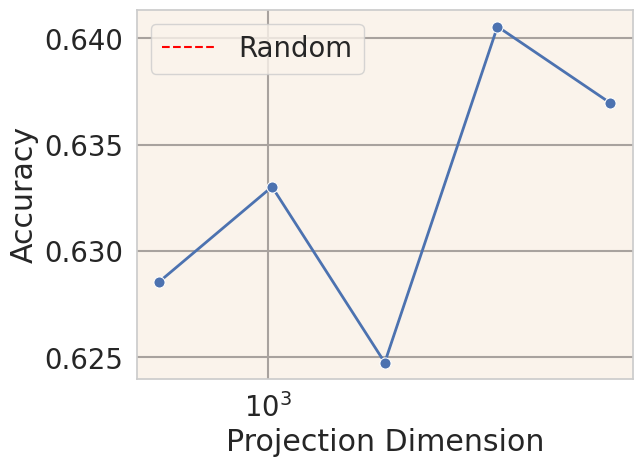

In [927]:
# test line graph
import seaborn as sns
import matplotlib.pyplot as plt

dataset = "dbpedia_10000"
# dataset = "ag_news_10000"

# metric = "dataset_full_ot_distance"
metric = "evaluation_best_eval_accuracy"
random_val = df[(
        (df["dataset"] == dataset) &
        (df["select_batch_fill_strategy"] == "random")
    )][metric].mean()

one_df = (
   df[(
        (df["dataset"] == dataset) &
        (df["select_batch_fill_strategy"] == "greedy") 
        # &
        # (df["select_projection_dim"] <= 4096)
    )]
).groupby(["select_projection_dim"])[metric].mean().reset_index()
# [col for col in one_df.columns if "size" in col]
ax = sns.lineplot(data=one_df, x="select_projection_dim", y=metric, lw=2, marker="o", markersize=8)
ax.set_xlabel("Projection Dimension")
ax.set_ylabel("Accuracy")
ax.set_xscale("log")

# draw horizontal line at random_val
plt.axhline(y=random_val, color='red', linestyle='--', label='Random')

# Add legend
plt.legend()
